In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)






In [2]:
df = pd.read_csv('train.csv')
df.shape

(43957, 15)

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
for col in list(df.columns):
    print(f"Name of col is: {col} == number of unique vals is: {str(df[col].nunique())} == data type is: {str(df[col].dtype)}")

Name of col is: age == number of unique vals is: 74 == data type is: int64
Name of col is: workclass == number of unique vals is: 8 == data type is: object
Name of col is: fnlwgt == number of unique vals is: 26646 == data type is: int64
Name of col is: education == number of unique vals is: 16 == data type is: object
Name of col is: educational-num == number of unique vals is: 16 == data type is: int64
Name of col is: marital-status == number of unique vals is: 7 == data type is: object
Name of col is: occupation == number of unique vals is: 14 == data type is: object
Name of col is: relationship == number of unique vals is: 6 == data type is: object
Name of col is: race == number of unique vals is: 5 == data type is: object
Name of col is: gender == number of unique vals is: 2 == data type is: object
Name of col is: capital-gain == number of unique vals is: 122 == data type is: int64
Name of col is: capital-loss == number of unique vals is: 97 == data type is: int64
Name of col is: ho

In [5]:
cat_columns = [ col for col in list(df.columns) if df[col].dtype =='object']
cat_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

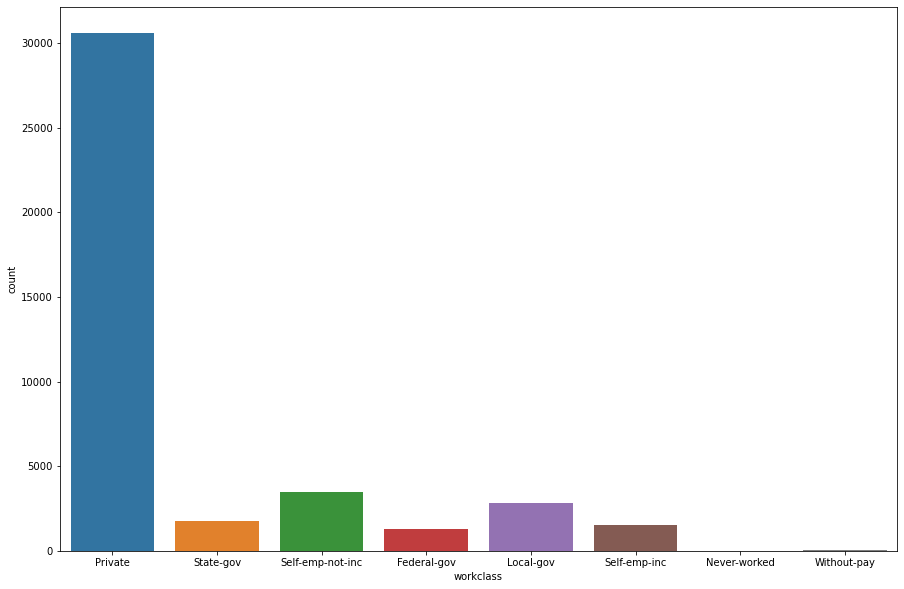

In [6]:
## show the countplot of Workclass variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(data = df, x = cat_columns[0])
plt.show()


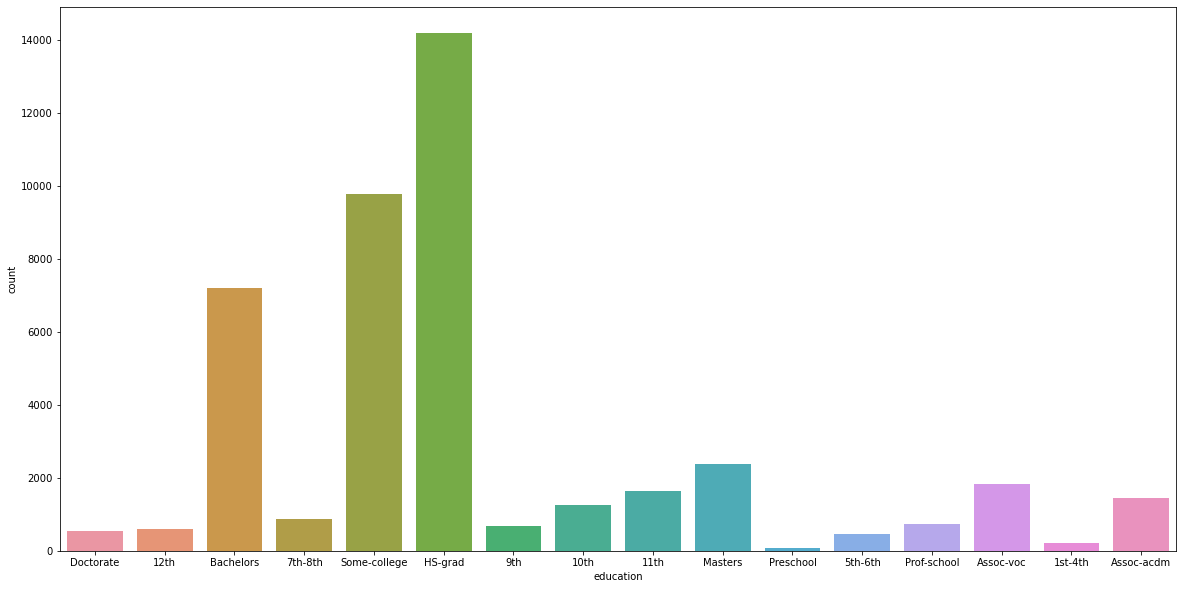

In [7]:
## show the countplot of Education variable
plt.figure(figsize=(20,10))
sns.countplot(data = df, x = cat_columns[1])
plt.show()

<AxesSubplot:xlabel='marital-status', ylabel='count'>

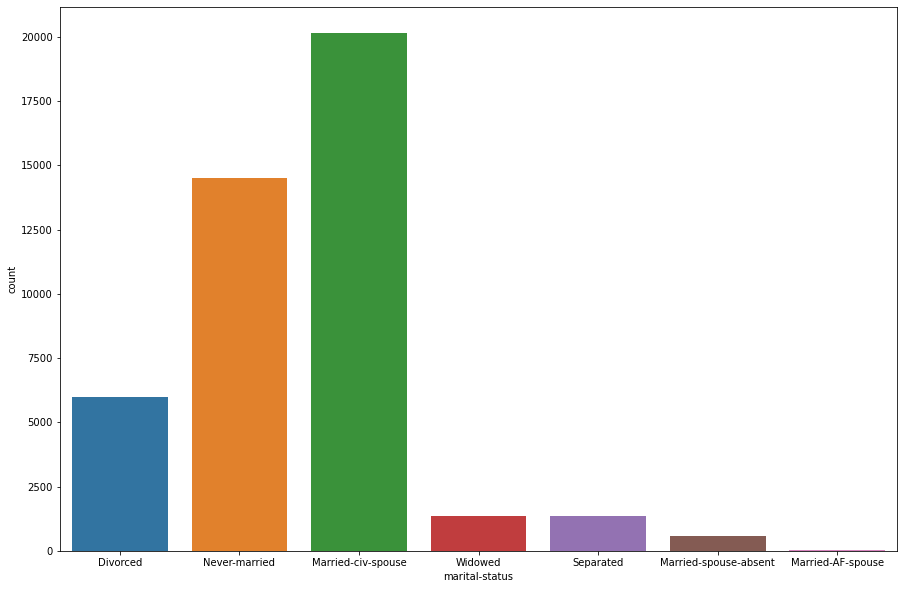

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(data = df, x = cat_columns[2])

<AxesSubplot:xlabel='occupation', ylabel='count'>

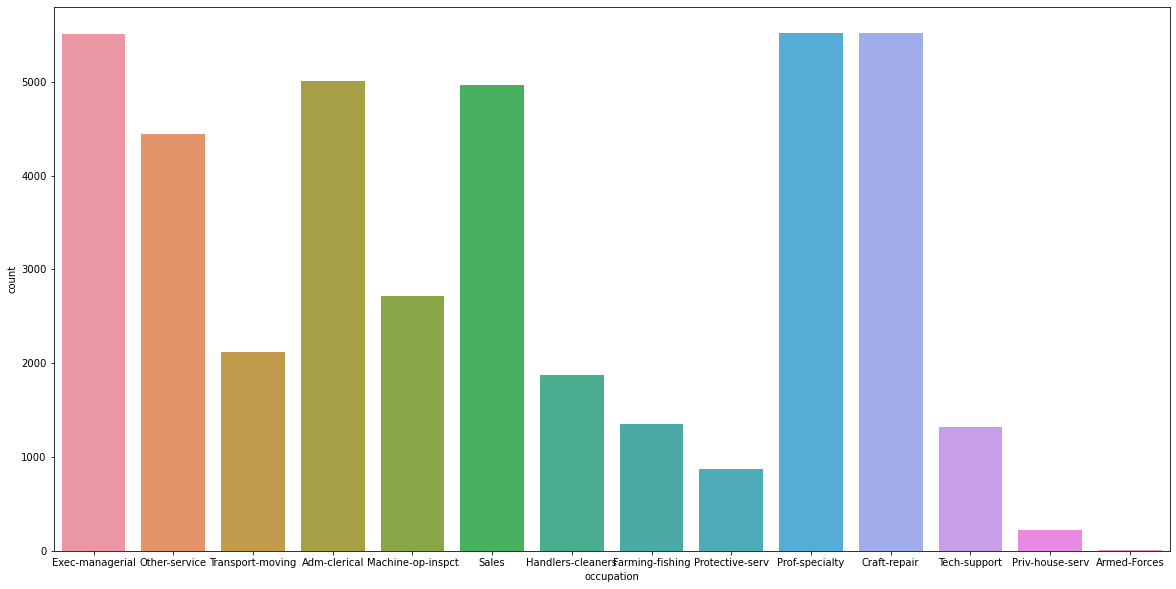

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(data = df, x = cat_columns[3])

<AxesSubplot:xlabel='relationship', ylabel='count'>

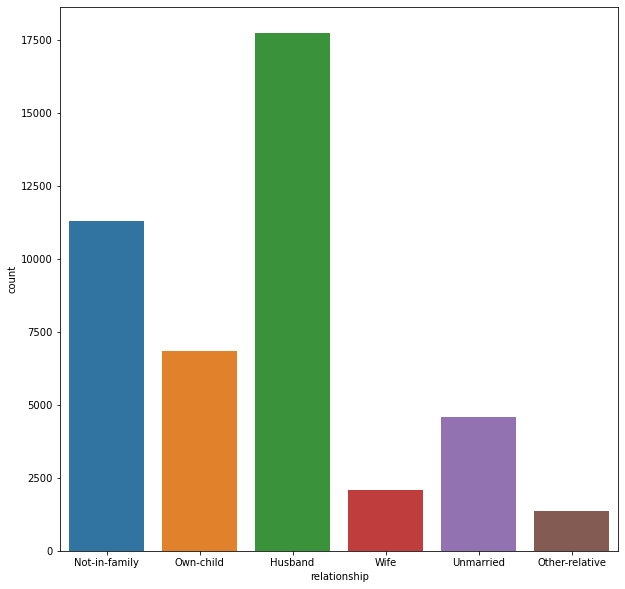

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = cat_columns[4])

<AxesSubplot:xlabel='race', ylabel='count'>

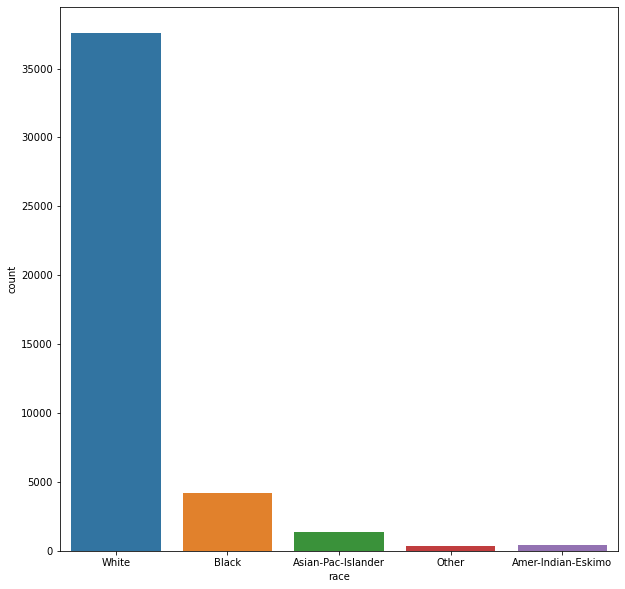

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = cat_columns[5])

<AxesSubplot:xlabel='gender', ylabel='count'>

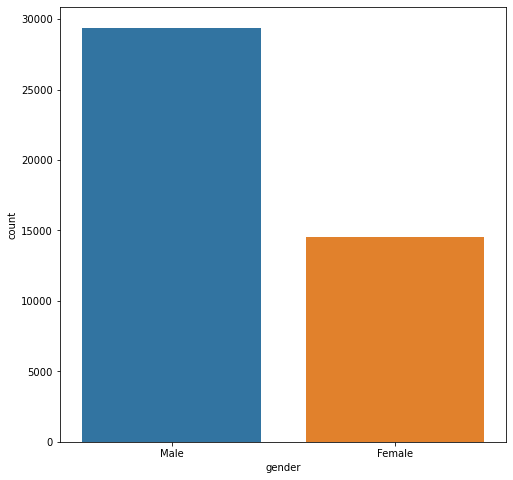

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(data = df, x = cat_columns[6])

<AxesSubplot:xlabel='native-country', ylabel='count'>

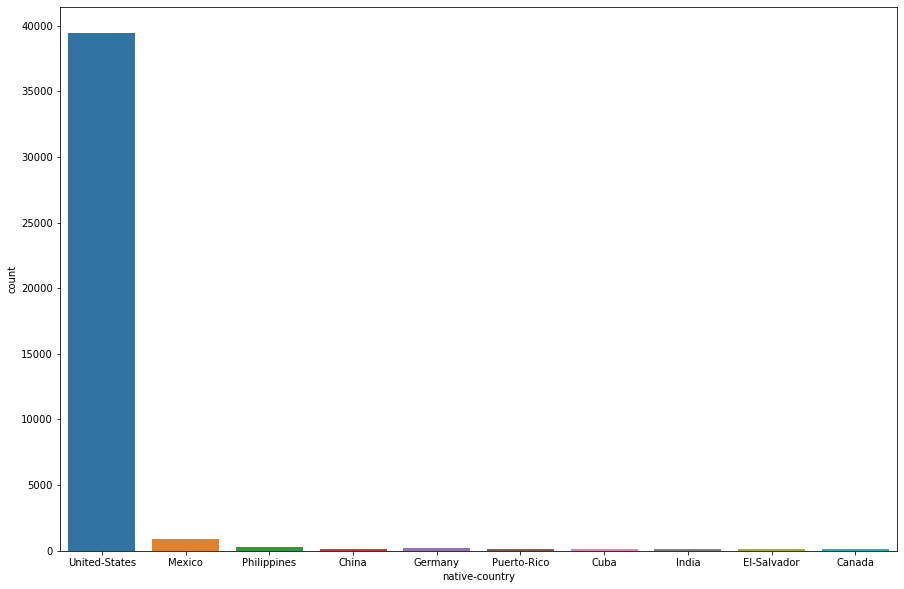

In [13]:
plt.figure(figsize=(15,10))
# selecting top 10 countries 
top_10 = list(df[cat_columns[7]].value_counts().head(10).index)
sns.countplot(data = df.loc[df[cat_columns[7]].isin(top_10)], x = cat_columns[7])

In [14]:
# Lets drop all Country Except US

df = df[df['native-country']=='United-States']

# drop 'native-country' column from cat_columns list 
df= df.drop('native-country', axis = 1)
cat_columns.remove('native-country')

In [15]:
#list of categorical 
cat_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender']

In [16]:
num_cols = [ col for col in list(df.columns) if df[col].dtype !='object'  and  col != 'income_>50K']
num_cols


['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [17]:
df_dummy = pd.get_dummies(df[cat_columns])
df_dummy.shape

(39429, 58)

In [18]:
print(list(df_dummy.columns))

['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service'

In [19]:
#final_dataset

final_df = pd.DataFrame()
final_df = pd.concat([df_dummy , df[num_cols] , df['income_>50K'] ] , axis = 1)
final_df.shape

(39429, 65)

In [20]:
list(final_df.columns)

['workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-o

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39429 entries, 0 to 43956
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   workclass_Federal-gov                 39429 non-null  uint8
 1   workclass_Local-gov                   39429 non-null  uint8
 2   workclass_Never-worked                39429 non-null  uint8
 3   workclass_Private                     39429 non-null  uint8
 4   workclass_Self-emp-inc                39429 non-null  uint8
 5   workclass_Self-emp-not-inc            39429 non-null  uint8
 6   workclass_State-gov                   39429 non-null  uint8
 7   workclass_Without-pay                 39429 non-null  uint8
 8   education_10th                        39429 non-null  uint8
 9   education_11th                        39429 non-null  uint8
 10  education_12th                        39429 non-null  uint8
 11  education_1st-4th                     394

In [22]:
final_df.isna().sum().sum()

0

### KNN Classifier

In [35]:
from sklearn.model_selection import train_test_split 
X = final_df.drop('income_>50K', axis =1)
y = final_df['income_>50K']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 42, stratify=y) 
print(X_train.shape)
print(X_test.shape)

(31543, 64)
(7886, 64)


In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [37]:
prediction = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
accuracy

0.7843012934313974

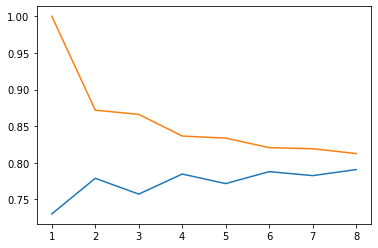

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')


In [30]:
from sklearn.model_selection import cross_val_score

In [32]:
cv_results = cross_val_score(knn, X, y, cv=5)
cv_results

array([0.78316003, 0.7862034 , 0.78468171, 0.7844281 , 0.78211795])

In [33]:
cv_results.mean()

0.7841182378378256

In [34]:
from sklearn.metrics import confusion_matrix

In [38]:
con = confusion_matrix(y_test, prediction)

In [39]:
con

array([[5668,  290],
       [1411,  517]], dtype=int64)

In [41]:
print(f"accuracy is: {(5668+517)/(5668+290+1411+517)}")

accuracy is: 0.7843012934313974


In [43]:
print(f"percision is: {5668/(5668+1411)}")

percision is: 0.8006780618731459


In [ ]:
# Training using Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier  
classifier1 = DecisionTreeClassifier(criterion='gini')  
classifier1.fit(X_train, y_train) 



In [ ]:

y_pred_1 = classifier1.predict(X_test)  
print(y_pred_1)

In [ ]:
from sklearn.metrics import accuracy_score #importing accuracy_score function from sklearn.metrics package
acc_1 = accuracy_score(y_test,y_pred_1)
print("Accuracy for Gini model {} %".format(acc_1*100))

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred_1))

In [ ]:
## [[8760 1306]
##  [1141 1981]]


# 8760 -->  people having less $50 k  - rightly predicted  # True Negative  ( target ==0 )
# 1981 -->  people having more $50 k  - rightly predicted  # True Positive  ( target ==1 )

# 1306 -->  people having less $50 k  - model say - they have more than $50K # False Positive 
# 1141 -->  people having more $50 k  - model say - they have less than $50K # False Negative

accuracy  = (8760 + 1981)/(8760+1306+1141+1981)
print(accuracy)

# precision  = True Positive / ( True Positive + False Positive)
precision = 1981/(1981 +1306)
print(precision)

# If I predict 10 people have more than $50K salary - then 60% of that 
#i.e. 6 people will have more than $50K salary

# Recall  = True Positive / (True Positive + False Negative)
recall = 1981/(1981+1141)
print(recall)

# That model will catch 63% of people who have salary more than $50K 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


classifier2 = KNeighborsClassifier(n_neighbors= 3)  
classifier2.fit(X_train, y_train) 

y_pred_2 = classifier2.predict(X_test)  

acc_2 = accuracy_score(y_test,y_pred_2)
print("Accuracy for KNN model {} %".format(acc_2*100))
print(confusion_matrix(y_test, y_pred_2))

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression(random_state=0)
classifier3.fit(X_train, y_train) 

y_pred_3 = classifier3.predict(X_test)  

acc_3 = accuracy_score(y_test,y_pred_3)
print("Accuracy for LR model {} %".format(acc_3*100))
print(confusion_matrix(y_test, y_pred_3))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  

classifier4 = GradientBoostingClassifier()  
classifier4.fit(X_train, y_train) 

y_pred_4 = classifier4.predict(X_test)  

acc_4 = accuracy_score(y_test,y_pred_4)
print("Accuracy for Gradient Boost model {} %".format(acc_4*100))
print(confusion_matrix(y_test, y_pred_4))

In [ ]:
from sklearn.ensemble import RandomForestClassifier  

classifier5 = RandomForestClassifier()  
classifier5.fit(X_train, y_train) 

y_pred_5 = classifier5.predict(X_test)  

acc_5 = accuracy_score(y_test,y_pred_5)
print("Accuracy for Random Forest model {} %".format(acc_5*100))
print(confusion_matrix(y_test, y_pred_5))

In [ ]:
# Lets create a manual ensemble 
from sklearn.metrics import f1_score

ensemble_df = pd.DataFrame()
ensemble_df['Pred1'] = y_pred_1
ensemble_df['Pred2'] = y_pred_2
ensemble_df['Pred3'] = y_pred_3
ensemble_df['Pred4'] = y_pred_4
ensemble_df['Pred5'] = y_pred_5
ensemble_df['Sum'] = ensemble_df.sum(axis = 1)
ensemble_df['Final'] = ensemble_df['Sum'] > 2 
ensemble_df['Final'] = ensemble_df['Final'].astype(int)

print(ensemble_df.head())

acc = accuracy_score(y_test,ensemble_df['Final'])
print("Accuracy for Emsemble model {} %".format(acc*100))
print(confusion_matrix(y_test,ensemble_df['Final']))
print('f1 Score -->' ,f1_score(y_test,ensemble_df['Final']))

In [ ]:
# Lets create a manual ensemble with weighted average

ensemble_df = pd.DataFrame()
ensemble_df['Pred1'] = y_pred_1
ensemble_df['Pred2'] = y_pred_2
ensemble_df['Pred3'] = y_pred_3
ensemble_df['Pred4'] = y_pred_4
ensemble_df['Pred5'] = y_pred_5
# DT 10% , KNN 5%  LR 5%  GB 40% RF 40 % 

ensemble_df['Sum'] = 0.1*ensemble_df['Pred1'] + 0.05*ensemble_df['Pred2'] + \
                     0.05*ensemble_df['Pred3'] + 0.4*ensemble_df['Pred4'] + \
                     0.4*ensemble_df['Pred5']
ensemble_df['Final'] = ensemble_df['Sum'] >= 0.4
ensemble_df['Final'] = ensemble_df['Final'].astype(int)

print(ensemble_df.head())

acc = accuracy_score(y_test,ensemble_df['Final'])
print("Accuracy for Emsemble model {} %".format(acc*100))
print(confusion_matrix(y_test,ensemble_df['Final']))
print('f1 Score -->' ,f1_score(y_test,ensemble_df['Final']))

## Hyper Parameter Tuning of Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

## base model & parameter grid

In [ ]:
# Base model 
g1 = DecisionTreeClassifier()

param_grid = { 
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20,25]
}



## Initiate Grid Search 

In [ ]:
%%time 
gs1 = GridSearchCV(estimator=g1, param_grid=param_grid, cv= 5, verbose = 3)
gs1.fit(X_train, y_train) 

## Best Parameters

In [ ]:
gs1.best_params_

## Best Model 

In [ ]:
best_model_1 = gs1.best_estimator_

y1 = best_model_1.predict(X_test)  

acc = accuracy_score(y_test,y1)
print("Accuracy for Grid Search DT  model {} %".format(acc*100))


print(confusion_matrix(y_test, y1))

## Hyper Parameter Tuning RandomForest 

In [ ]:
# Base model 
g2 = RandomForestClassifier()

param_grid = { 
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50,100,200],
    'max_depth': [5,10,15],
    'max_features': ['auto', 'sqrt', ]
}



In [ ]:
%%time 
gs2 = GridSearchCV(estimator=g2, param_grid=param_grid, cv= 5, verbose = 3)
gs2.fit(X_train, y_train) 

In [ ]:
gs2.best_params_

In [ ]:
best_model_2 = gs2.best_estimator_

y2 = best_model_2.predict(X_test)  

acc = accuracy_score(y_test,y2)
print("Accuracy for Grid Search RF  model {} %".format(acc*100))


print(confusion_matrix(y_test, y2))

## Hyper Parameter Tuning of Gradient Boosting

In [ ]:
# Base model 
g3 = GradientBoostingClassifier()

param_grid = { 
    'n_estimators': [50,100,200],
    'max_depth': [5,10,15],
}



In [ ]:
%%time 
gs3 = GridSearchCV(estimator=g3, param_grid=param_grid, cv= 5, verbose = 3)
gs3.fit(X_train, y_train) 

In [ ]:
gs3.best_params_

In [ ]:
best_model_3 = gs3.best_estimator_

y3 = best_model_3.predict(X_test)  

acc = accuracy_score(y_test,y3)
print("Accuracy for Grid Search Gradient Boosting  model {} %".format(acc*100))


print(confusion_matrix(y_test, y3))

In [ ]:
# # Implementation of SVM 

# from sklearn.svm import SVC
# svc_clf = SVC(C= 1.0 , kernel='poly')

# svc_clf.fit(X_train, y_train)
# svc_pred = svc_clf.predict(X_test)  

# acc_svc = accuracy_score(y_test,svc_pred)
# print("Accuracy for Support Vector Model {} %".format(acc_svc*100))
# print(confusion_matrix(y_test, svc_pred))

In [ ]:
# Scaling  

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

sc.fit(X_train)
XS_train = sc.transform(X_train)
XS_test = sc.transform(X_test)



In [ ]:
XS_train

In [ ]:
# Implementation of SVM 

from sklearn.svm import SVC
svc_clf = SVC(C= 1.0 , kernel='poly')

svc_clf.fit(XS_train, y_train)
svc_pred = svc_clf.predict(XS_test)  

acc_svc = accuracy_score(y_test,svc_pred)
print("Accuracy for Support Vector Model {} %".format(acc_svc*100))
print(confusion_matrix(y_test, svc_pred))

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC(C= 1.0 , kernel='rbf')

svc_clf.fit(XS_train, y_train)
svc_pred = svc_clf.predict(XS_test)  

acc_svc = accuracy_score(y_test,svc_pred)
print("Accuracy for Support Vector Model {} %".format(acc_svc*100))
print(confusion_matrix(y_test, svc_pred))

In [ ]:
# Data set Info  - check missing values 
# Visulaization  - 
# Transformation  - Dummies 
# Test - Train Split 
# Modeling

# R2 and adj R2  